# 3 Exploratory_Data_Analysis

## 3.1 Imports and set display

In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [175]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In [176]:
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf

In [177]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings

In [178]:
warnings.filterwarnings('ignore')

definite a function for scatterplots between independent variables and target variable

In [179]:
def scatterplots(data, columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        sns.scatterplot(x = col, y = 'total_sale_price', data=data, alpha=0.5, ax=ax)
        ax.set(xlabel=col, ylabel='total_sale_price')
    nsubplots = nrow * ncol
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

## 3.2 Load  datasets

dataset house_Oct29_2023.csv can be download from 
https://drive.google.com/file/d/128FhCc9RCC3jLvEJHo216mhuJ5v36rUK/view?usp=drive_link

In [180]:
# load datasets
house = pd.read_csv('house_Oct29_2023.csv', index_col=0)
house.head()

,owner1,owner2,mailing_address1,mailing_address2,mailing_address3,real_estate_id,street_number,street_prefix,street_name,street_type,street_suffix,planning_jurisdiction,street_misc,township,fire_district,land_sale_price,zoning,deeded_acreage,total_sale_price,assessed_building_value,assessed_land_value,parcel_identification,special_district1,billing_class,property_description,land_classification,deed_book,deed_page,vcs,property_index,year_built,units,heated_area,utilities,year_of_addition,effective_year,remodeled_year,special_write_in,story_height,design_style,foundation_basement,foundation_basement_percent,exterior_wall,roof_floor_system,interior_finish1_percent,interior_finish2_percent,heat,heat_percent,air,air_percent,bath,bath_fixtures,built_in1_description,built_in2_description,built_in3_description,built_in4_description,built_in5_description,grade,assessed_grade_difference,accrued_assessed_condition_pct,land_deferred_code,land_deferred_amount,historic_deferred_code,historic_deferred_amount,recycled_units,disq_and_qual_flag,land_disq_and_qual_flag,type_and_use,physical_city,physical_zip_code,physical_location,land_sale_year,total_sale_year,deed_year,land_sale_month,total_sale_month,deed_month,distance_nearest_city,nearest_city,population_per_square_mile,unemployment_rate
0,BONES 13 LLC,NaN,306 MIDENHALL WAY,CARY NC 27513-5569,NaN,3,6012,NaN,TRIANGLE,DR,NaN,RA,A,8,NaN,0,IX-3,2.00,740000,524503,392040,0778.03 40 5654 000,NaN,1,LO7 OLD SOUTH DEVELOPMENT CORP,C,14675,2635,GWRA001,J W BURRESS,1979.0,0,8508,ALL,NaN,1984.0,NaN,NaN,A,A,D,0,O,C,NaN,NaN,G,0,A,10,I,0,NaN,NaN,NaN,NaN,NaN,29.61,110,47,NaN,0,NaN,0,0,A,NaN,20.0,RALEIGH,27617.0,6012 TRIANGLE DR A,NaN,2012.0,2012.0,NaN,3.0,3,13.261294,CARY,1111.136263,7.3
1,6421 WESTGATE REALTY LLC,NaN,PO BOX 90667,RALEIGH NC 27675-0667,NaN,43396,6408,NaN,OLD WESTGATE,RD,NaN,RA,NaN,8,NaN,0,IX-3,2.54,1650000,5013736,886242,0768.04 92 9999 000,NaN,1,PROP OF WILLIAMS INVESTMENT CORPORATION,C,14716,1642,GWRA001,WESTGATE JEEP SALES & SERVICE,1965.0,0,27778,ALL,NaN,2015.0,2018.0,NaN,A,A,D,0,B,C,NaN,NaN,A,0,A,0,I,0,NaN,NaN,NaN,NaN,NaN,29.71,130,99,NaN,0,NaN,0,0,A,NaN,19.0,RALEIGH,27617.0,6408 OLD WESTGATE RD,NaN,2012.0,2012.0,NaN,4.0,4,13.261294,CARY,1111.136263,7.3
2,ASH GREY PROPERTIES LLC,NaN,5805 LEASE LN,RALEIGH NC 27617-4708,NaN,45910,8401,NaN,EBENEZER CHURCH,RD,NaN,RA,NaN,8,NaN,0,IX-3,0.97,105000,80884,171125,0777.02 69 6704 000,NaN,1,LO7 ASH GREY PROPERTIES LLC BM2013-01575,R,14744,1699,GWRA001,GWRA001,1959.0,1,616,E,NaN,1985.0,NaN,NaN,A,A,D,0,A,NaN,NaN,NaN,A,0,A,0,A,0,NaN,NaN,NaN,NaN,NaN,D-10,75,76,NaN,0,NaN,0,1,A,NaN,1.0,RALEIGH,27617.0,8401 EBENEZER CHURCH RD,NaN,2012.0,2012.0,NaN,4.0,4,13.261294,CARY,1111.136263,7.3
3,CAP2 REALTY LLC,NaN,7201 SPARHAWK RD,WAKE FOREST NC 27587-4529,NaN,47829,6508,NaN,MT HERMAN,RD,NaN,RA,NaN,8,NaN,0,IX-3,2.90,975000,1187520,409290,0768.02 86 1192 000,NaN,1,LO1 6508 MT HERMAN RD BM2015-00579,C,19002,0217,GWRA001,ECGS,2005.0,0,20700,ALL,2015.0,2010.0,2015.0,NaN,A,A,NaN,0,O,C,NaN,NaN,A,64,A,64,I,0,NaN,NaN,NaN,NaN,NaN,29.55,100,91,NaN,0,NaN,0,0,A,NaN,20.0,RALEIGH,27617.0,6508 MT HERMAN RD,NaN,2012.0,2022.0,NaN,5.0,4,13.261294,CARY,1111.136263,7.3
4,A&A OF NC INC,NaN,5917 TRIANGLE DR,RALEIGH NC 27617-4742,NaN,65238,5917,NaN,TRIANGLE,DR,NaN,RA,NaN,8,NaN,0,IX-3,0.95,330000,300764,186219,0778.04 50 5768 000,NaN,1,LO17 PROP OLD SOUTH DEV CORP,D,15046,2414,GWRA001,A & A OF N.C./DBA DIAMOND TOUCH CONSTRUC,1972.0,0,4000,WSE,2014.0,2000.0,NaN,NaN,A,A,NaN,0,O,C,NaN,NaN,A,54,A,54,I,0,NaN,NaN,NaN,NaN,NaN,41.61,110,75,NaN,0,NaN,0,0,A,NaN,82.0,RALEIGH,27617.0,5917 TRIANGLE DR,NaN,2012.0,2012.0,NaN,12.0,12,13.261294,CARY,1111.136263,7.3


## 3.3 Check Dataset

In [181]:
house.shape

(346129, 81)

In [182]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Index: 346129 entries, 0 to 346128
Data columns (total 81 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   owner1                          346129 non-null  object 
 1   owner2                          69626 non-null   object 
 2   mailing_address1                346129 non-null  object 
 3   mailing_address2                346127 non-null  object 
 4   mailing_address3                5294 non-null    object 
 5   real_estate_id                  346129 non-null  int64  
 6   street_number                   346129 non-null  int64  
 7   street_prefix                   11098 non-null   object 
 8   street_name                     346129 non-null  object 
 9   street_type                     345010 non-null  object 
 10  street_suffix                   369 non-null     object 
 11  planning_jurisdiction           346129 non-null  object 
 12  street_misc          

check the following variables with numberic dtypes, they may NOT continuous variables

In [183]:
house['township'].unique(), house['fire_district'].unique(), house['billing_class'].unique(), house['type_and_use'].unique()

(array([ 8,  5,  1, 17, 13, 16, 10,  9, 18, 11,  2,  7,  4, 20, 12,  6, 15,
         3, 19, 14], dtype=int64),
 array([nan, 23., 24., 26.]),
 array([1, 2, 3, 6, 5, 4], dtype=int64),
 array([ 20.,  19.,   1.,  82.,  47.,  84.,   7.,  61.,  85.,  36.,  34.,
         nan,   2., 108.,  83., 115.,  45.,  39.,   3.,  35.,   4.,  38.,
         66.,  37.,  72.,  46.,  79.,  76.,   6.,  16.,  17., 100.,   9.,
          5.,  48., 200.,  55.,  11.,  86.,  40.,  68.,  33.,  56.,  29.,
         42.,  54.,  41.,  63.,   8.,  49.,  78.,  23.,  77.,  58.,  65.,
         80.,  24.,  91.,  30.,  51.,  67.,  43., 340., 106.,  57.,  74.,
         25.,  18.,  94.,  22.,  31.,  69.,  75., 360., 114.,  93.,  60.,
         97.,  14.,  32.,  10.,  50., 104.,  44.,  73.,  12.,  59., 109.,
         99.,  95.,  27.,  21., 103.,  70.,  15.,  92.,  71.,  28.,  89.,
         53.,  96.,  64.,  52.,  98.]))

street_number is the numerical addresses of houses<br>

township is the township of the house located at, in this dataset, it use numbers 1-20 to represent 20 townships<br>

fire_district is the township of the house located at, in this dataset, it use numbers 23,24,26, but has lots of nan<br>

billing_class use number 1-6 to represent corporation, individuals, exempt, public service, life estate and HOA.<br>

type_and_use is the use of the house, it also use numbers to represent the use. for example, 1 means 1 family, 8 means townhouse, 11 means bank etc.<br>

<font color=red>**Although all these are numbers, but they should be treated as categorical variables.** 

In [184]:
house['street_number'] = house['street_number'].astype(str)
house['township'] = house['township'].astype(str)
house['fire_district'] = house['fire_district'].astype(str)
house['billing_class'] = house['billing_class'].astype(str)
house['type_and_use'] = house['type_and_use'].astype(str)
house['physical_zip_code'] =  house['physical_zip_code'].astype(str)
house['real_estate_id'] = house['real_estate_id'].astype(str)

check statistics description to get lists of continuous variables and categorical variables quickly

In [185]:
des = house.describe(include='all')
des

,owner1,owner2,mailing_address1,mailing_address2,mailing_address3,real_estate_id,street_number,street_prefix,street_name,street_type,street_suffix,planning_jurisdiction,street_misc,township,fire_district,land_sale_price,zoning,deeded_acreage,total_sale_price,assessed_building_value,assessed_land_value,parcel_identification,special_district1,billing_class,property_description,land_classification,deed_book,deed_page,vcs,property_index,year_built,units,heated_area,utilities,year_of_addition,effective_year,remodeled_year,special_write_in,story_height,design_style,foundation_basement,foundation_basement_percent,exterior_wall,roof_floor_system,interior_finish1_percent,interior_finish2_percent,heat,heat_percent,air,air_percent,bath,bath_fixtures,built_in1_description,built_in2_description,built_in3_description,built_in4_description,built_in5_description,grade,assessed_grade_difference,accrued_assessed_condition_pct,land_deferred_code,land_deferred_amount,historic_deferred_code,historic_deferred_amount,recycled_units,disq_and_qual_flag,land_disq_and_qual_flag,type_and_use,physical_city,physical_zip_code,physical_location,land_sale_year,total_sale_year,deed_year,land_sale_month,total_sale_month,deed_month,distance_nearest_city,nearest_city,population_per_square_mile,unemployment_rate
count,346129,69626,346129,346127,5294,346129,346129,11098,346129,345010,369,346129,12740,346129,346129,3.461290e+05,346122,346129.000000,3.461290e+05,3.461290e+05,3.461290e+05,346129,2741,346129,346099,346121,345907,346129,346129,344909,340970.000000,346129.000000,346129.000000,343694,14372.000000,340967.000000,8838.000000,87,339750,339721,274117,346129.000000,339748,10550,3375.000000,3375.000000,339730,346129.000000,339752,346129.000000,339718,346129.000000,267759,598,65,3,14,340971,346129.000000,346129.000000,394,3.461290e+05,214,3.461290e+05,346129.000000,345888,134531,346129,346129,346129,346129,138046.000000,346129.000000,346123.00000,138050.000000,346129.000000,346129.000000,346129.000000,346129,346129.000000,346129.000000
unique,313166,65999,299440,74243,1782,346129,10623,8,18423,41,7,15,1045,20,4,NaN,313,NaN,NaN,NaN,NaN,346123,9,6,343364,23,17492,4031,5064,13201,NaN,NaN,NaN,15,NaN,NaN,NaN,40,15,15,6,NaN,26,6,NaN,NaN,7,NaN,3,NaN,10,NaN,21,13,13,2,14,276,NaN,NaN,1,NaN,1,NaN,NaN,19,18,104,19,39,345894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,NaN,NaN
top,AC BLACKWOLF RUN OWNER LLC,BEAUTIFUL DREAMER APARTMENTS INC,PO BOX 4090,SCOTTSDALE AZ 85261-4090,AGOURA HILLS CA 91301-2148,3,104,E,MAIN,DR,W,RA,101,20,nan,NaN,R-4,NaN,NaN,NaN,NaN,0785.12 85 1079 004,RML,2,LO1,R,-E-,0001,09WC900,09WC900,NaN,NaN,NaN,ALL,NaN,NaN,NaN,ROOM HSE,C,A,D,NaN,A,C,NaN,NaN,A,NaN,A,NaN,D,NaN,One Fireplace,Sprinkler Syste,Sprinkler Syste,1 Passenger Ele,04FIRPL,B,NaN,NaN,L,NaN,H,NaN,NaN,A,A,1.0,RALEIGH,27587.0,607 S MAIN ST,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RALEIGH,NaN,NaN
freq,329,21,1683,1683,697,1,2576,2956,665,110357,169,133841,863,36479,280890,NaN,43338,NaN,NaN,NaN,NaN,2,1335,315203,130,316762,1043,1240,978,976,NaN,NaN,NaN,255262,NaN,NaN,NaN,38,154927,250280,225220,NaN,171358,5337,NaN,NaN,336813,NaN,334211,NaN,134111,NaN,254284,259,25,2,1,37118,NaN,NaN,394,NaN,214,NaN,NaN,316731,82744,324788,158004,23883,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85190,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.944629e+04,NaN,0.517736,3.902407e+05,3.160589e+05,1.084197e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1996.149218,1.145917,2848.997914,NaN,2016.793905,1999.582458,2016.516633,NaN,NaN,NaN,NaN,2.275666,NaN,NaN,47.039407,47.039407,NaN,0.085532,NaN,0.180152,NaN,0.528083,NaN,NaN,NaN,NaN,NaN,NaN,117.107613,80.787004,NaN,7.002975e+02,NaN,4.707648e+02,1.215642,NaN,NaN,NaN,NaN,NaN,NaN,2005.259696,2011.243273,2013.26759,6.563593,6.609490,6.642154,5.942477,NaN,1078.308440,4.452135
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.309334e+05,NaN,2.494732,1.868029e+06,1.416445e+06,3.523910e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.914887,7.480297,10626.204848,NaN,5.370560,15.017199,4

In [186]:
continuous_variables = list(des.columns[des.T['mean'].notna()])
categorical_variables = list(set(house.columns) - set(continuous_variables))

In [187]:
print(f"This dataset have {house.shape[1]} variables in total")
print(f"This dataset have {len(continuous_variables)} variables as continuous variables ")
print(f"This dataset have {len(categorical_variables)} variables as categorical variables ")

This dataset have 81 variables in total
This dataset have 31 variables as continuous variables 
This dataset have 50 variables as categorical variables 


## 3.4 Distribution and Correlation

### 3.4.1 Histgrams

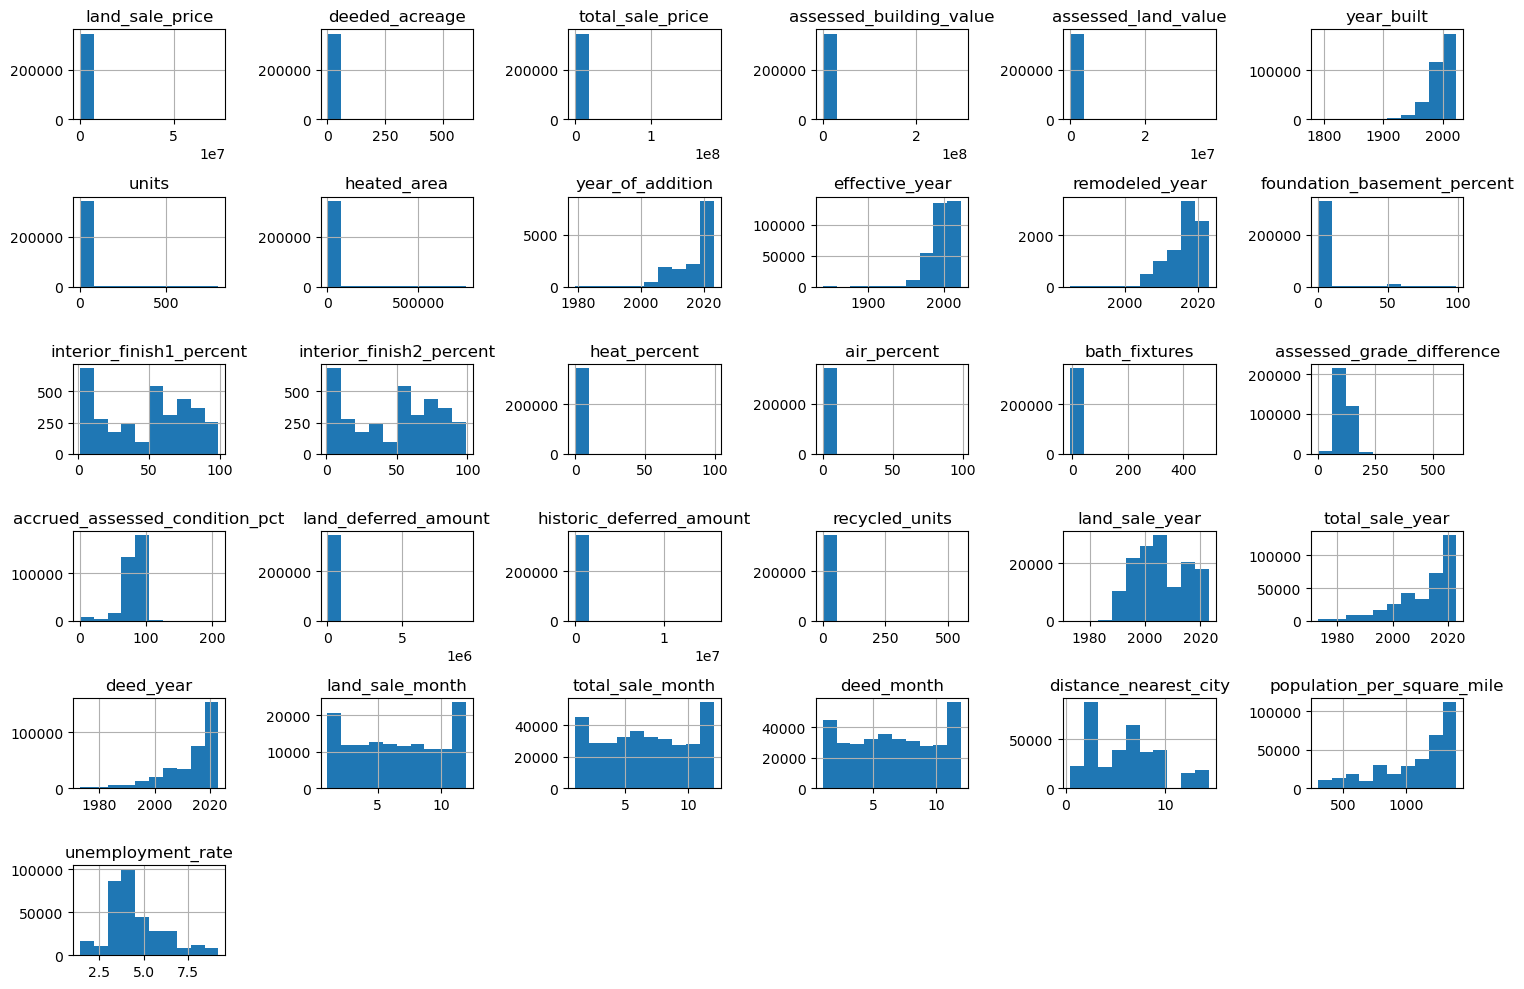

In [188]:
house.hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.8)
plt.subplots_adjust(wspace=0.8)
plt.tight_layout()

The distributions of toal_sale_price, assessed_building_values and assessed_land_values etc are very strange, they have high positive skewness.

In [189]:
house[['total_sale_price', 'assessed_building_value', 'assessed_land_value']].skew()

total_sale_price           38.676238
assessed_building_value    57.431078
assessed_land_value        29.834260
dtype: float64

for example, check the boxplot of total_sale_price for each city

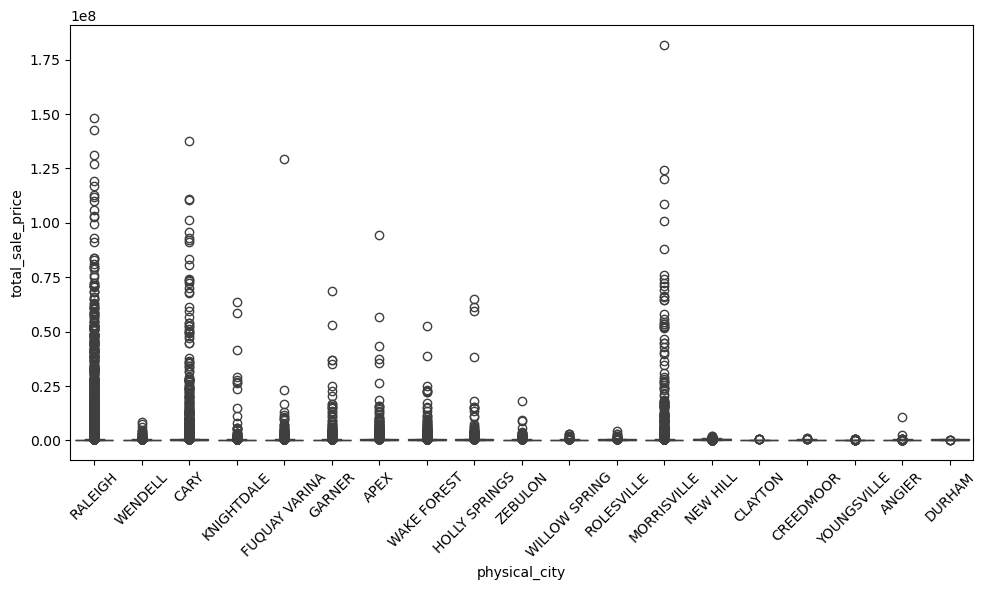

In [190]:
plt.figure(figsize=(10,6))
sns.boxplot(data=house, x='physical_city', y='total_sale_price')
plt.xticks(rotation=45)
plt.tight_layout();

the above boxplot confirmed our conclusion, there are too much outliers. let's check the percentage

In [191]:
house['total_sale_price'].describe()

count    3.461290e+05
mean     3.902407e+05
std      1.868029e+06
min      0.000000e+00
25%      1.600000e+05
50%      2.640000e+05
75%      4.000000e+05
max      1.818000e+08
Name: total_sale_price, dtype: float64

from the description of total_sale_price, the 1st quantile is 1.6e5, third quantile is 4e5, IQR=2.4e5, but the maxmimum is 1.8e8, that's crazy....

In [192]:
more_than_75 = house[house['total_sale_price']>4*10**5].shape[0]/house.shape[0]*100
more_than_one_and_half_75 = house[house['total_sale_price']>(4*10**5*1.5)].shape[0]/house.shape[0]*100
print(f'The total_sale_price have {more_than_75} percent more than 75% percentile')
print(f'The total_sale_price have {more_than_one_and_half_75} percent more than 1.5 times 75% percentile')

The total_sale_price have 24.813581063707463 percent more than 75% percentile
The total_sale_price have 8.872703529608902 percent more than 1.5 times 75% percentile


let's try remove total_sale_price more than 1.5 times 75% percentile to see what happened.

<font color=red>NOTE: this is just for test, we will still try to use original dataset at first!!!

In [193]:
house_1 = house[house['total_sale_price']<6*10**5]

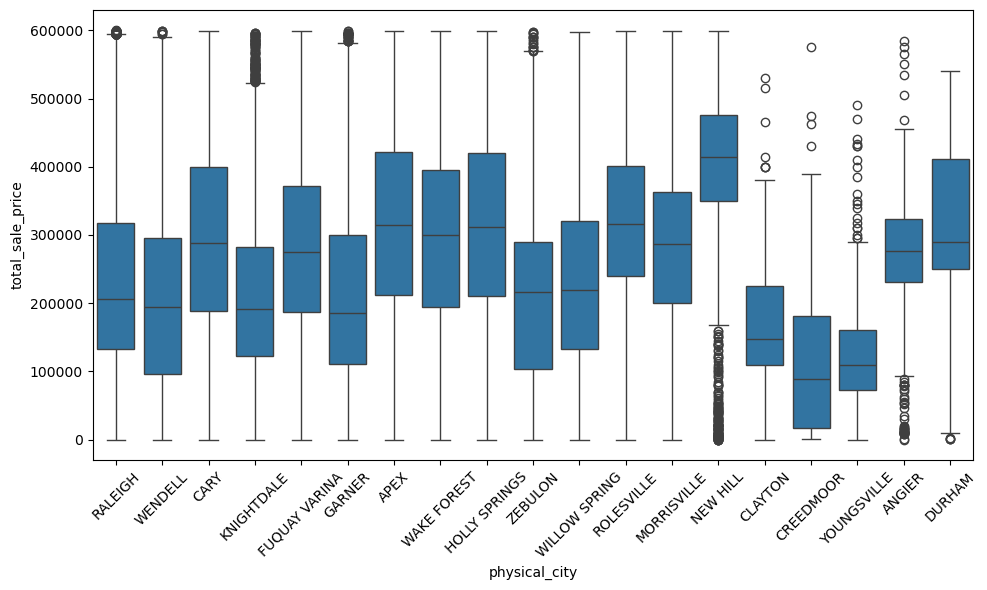

In [194]:
plt.figure(figsize=(10,6))
sns.boxplot(data=house_1, x='physical_city', y='total_sale_price')
plt.xticks(rotation=45)
plt.tight_layout();

looks much better

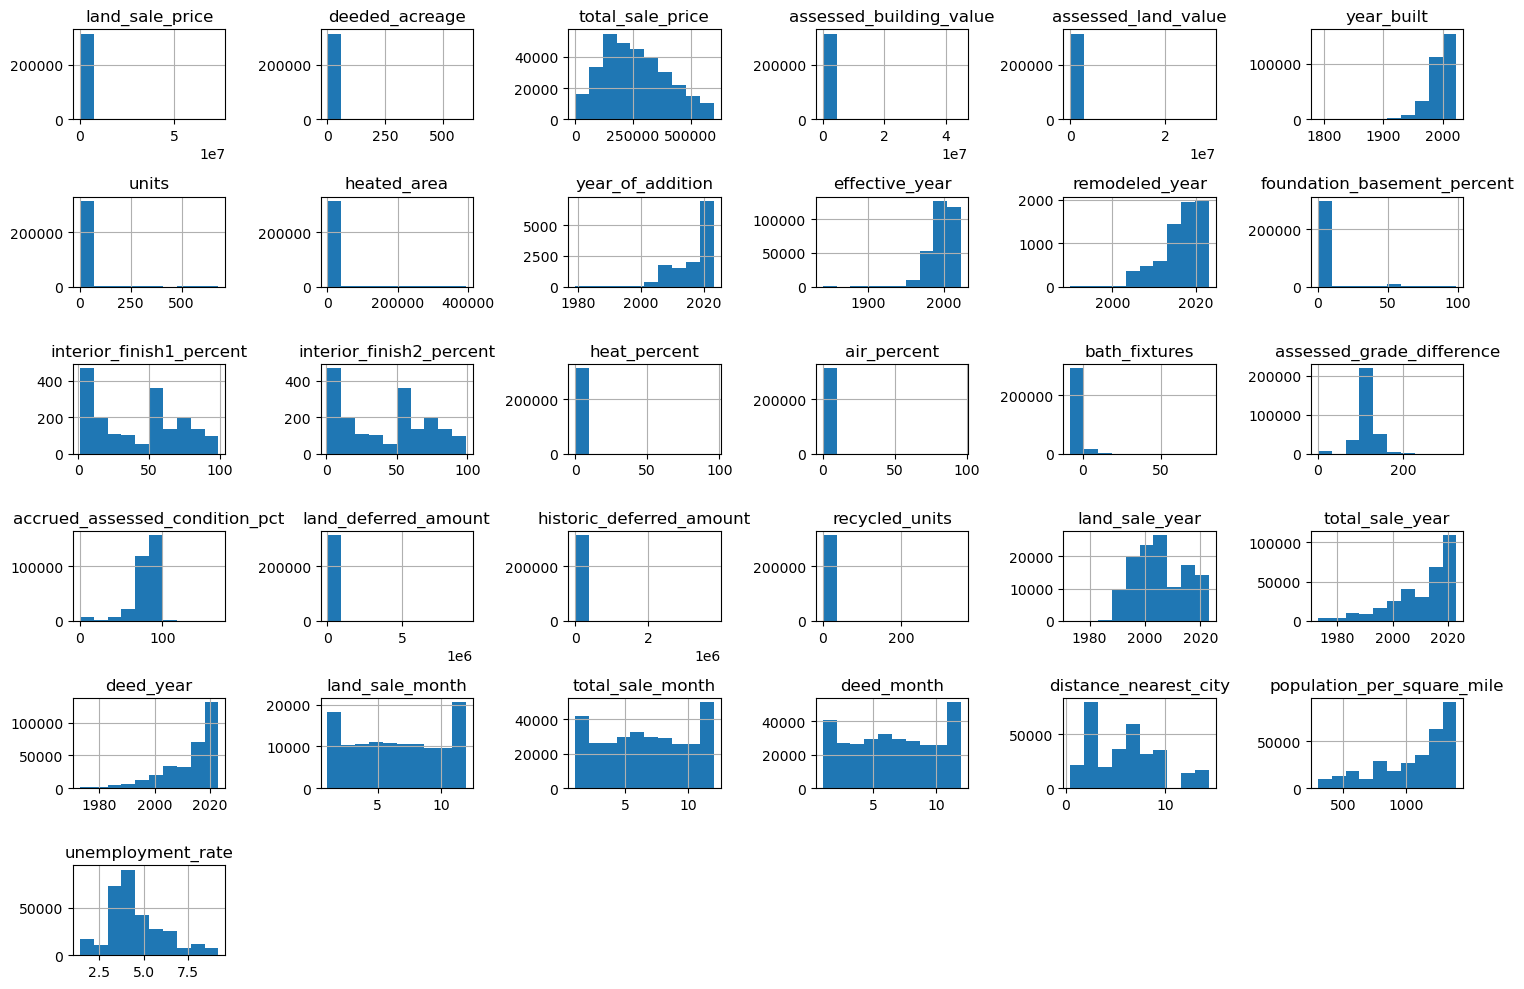

In [195]:
house_1.hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.8)
plt.subplots_adjust(wspace=0.8)
plt.tight_layout()

the total_sale_price looks much better, but other variables like assessed_building_value and assessed_land_value are still not good. **Keep this in mind, if we need a smaller dataset, maybe we can do this.**

<font color=red>But the following, we still using original dataset.

### 3.4.2 Scatterplots

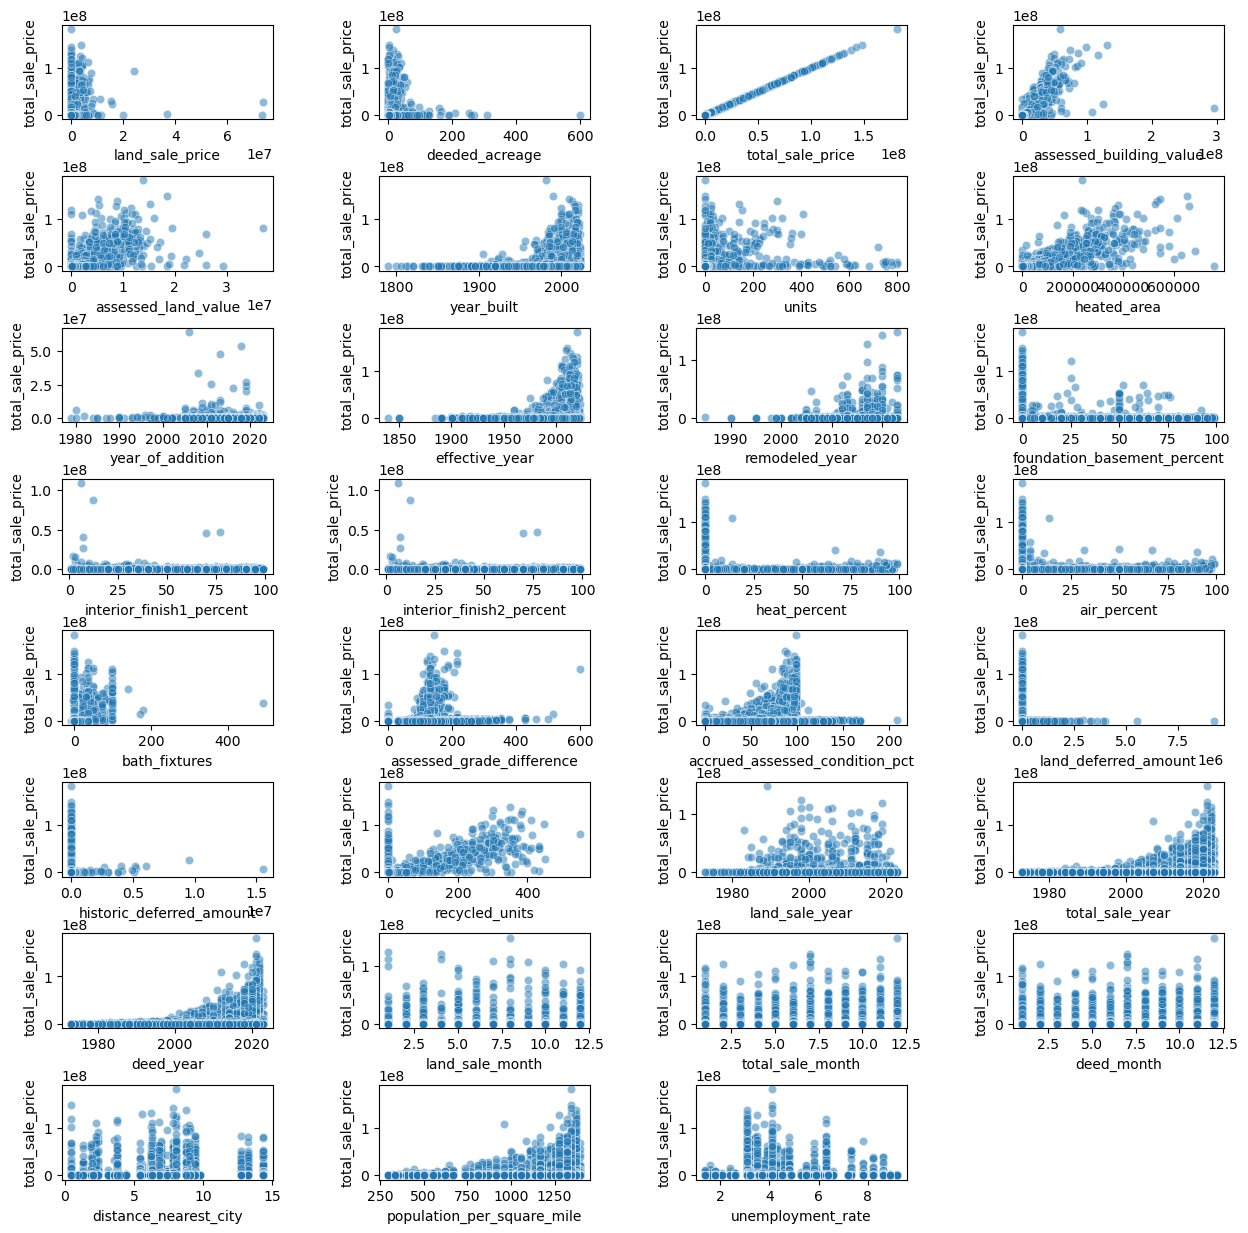

In [196]:
scatterplots(house, continuous_variables, ncol=4, figsize=(15, 15))

based on the scatterplots, we can find the assessed_building_value, heated_area have linear correlation with total_sale_price.<br>

the datatime variables like year_built, total_sale_year, deed_year and population_per_square_mile have exponential relationships with total_sale_price.<br>

<font color=red>mentor suggest try add new variables like squared(total_sale_year) or sqrt(total_sale_year) to see what happened to the linear model.

### 3.4.3 Skewness

In [197]:
house.skew(numeric_only=True).sort_values(ascending=False)

historic_deferred_amount          217.762219
land_sale_price                   209.833622
land_deferred_amount              111.758274
deeded_acreage                     74.211249
units                              67.242499
assessed_building_value            57.431078
total_sale_price                   38.676238
recycled_units                     37.154599
heat_percent                       30.040698
assessed_land_value                29.834260
heated_area                        29.551881
bath_fixtures                      29.408519
air_percent                        20.318073
foundation_basement_percent         5.023128
unemployment_rate                   0.823657
distance_nearest_city               0.539004
land_sale_year                      0.137622
land_sale_month                     0.018977
deed_month                         -0.006320
total_sale_month                   -0.010189
interior_finish1_percent           -0.111459
interior_finish2_percent           -0.111459
assessed_g

There are variables have very high positive skewness. May be try log transformation?

### 3.4.4 Check Statistics Before Log Transformation

In [198]:
continuous_des = house[continuous_variables].describe()
continuous_des

,land_sale_price,deeded_acreage,total_sale_price,assessed_building_value,assessed_land_value,year_built,units,heated_area,year_of_addition,effective_year,remodeled_year,foundation_basement_percent,interior_finish1_percent,interior_finish2_percent,heat_percent,air_percent,bath_fixtures,assessed_grade_difference,accrued_assessed_condition_pct,land_deferred_amount,historic_deferred_amount,recycled_units,land_sale_year,total_sale_year,deed_year,land_sale_month,total_sale_month,deed_month,distance_nearest_city,population_per_square_mile,unemployment_rate
count,3.461290e+05,346129.000000,3.461290e+05,3.461290e+05,3.461290e+05,340970.000000,346129.000000,346129.000000,14372.000000,340967.000000,8838.000000,346129.000000,3375.000000,3375.000000,346129.000000,346129.000000,346129.000000,346129.000000,346129.000000,3.461290e+05,3.461290e+05,346129.000000,138046.000000,346129.000000,346123.00000,138050.000000,346129.000000,346129.000000,346129.000000,346129.000000,346129.000000
mean,2.944629e+04,0.517736,3.902407e+05,3.160589e+05,1.084197e+05,1996.149218,1.145917,2848.997914,2016.793905,1999.582458,2016.516633,2.275666,47.039407,47.039407,0.085532,0.180152,0.528083,117.107613,80.787004,7.002975e+02,4.707648e+02,1.215642,2005.259696,2011.243273,2013.26759,6.563593,6.609490,6.642154,5.942477,1078.308440,4.452135
std,2.309334e+05,2.494732,1.868029e+06,1.416445e+06,3.523910e+05,19.914887,7.480297,10626.204848,5.370560,15.017199,4.698504,10.928221,29.399985,29.399985,2.356503,3.099433,2.690261,27.078729,17.161970,3.407669e+04,4.261848e+04,7.773355,9.194047,10.712155,9.29048,3.414896,3.295368,3.295588,3.648850,292.550410,1.548616
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1790.000000,0.000000,0.000000,1979.000000,1840.000000,1985.000000,0.000000,1.000000,1.000000,0.000000,0.000000,-8.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,1973.000000,1973.000000,1973.00000,1.000000,1.000000,1.000000,0.449741,296.842547,1.400000
25%,0.000000e+00,0.130000,1.600000e+05,1.565260e+05,4.500000e+04,1986.000000,1.000000,1528.000000,2014.000000,1991.000000,2014.000000,0.000000,16.000000,16.000000,0.000000,0.000000,0.000000,105.000000,77.000000,0.000000e+00,0.000000e+00,1.000000,1998.000000,2005.000000,2008.00000,4.000000,4.000000,4.000000,2.260920,870.514107,3.400000
50%,0.000000e+00,0.240000,2.640000e+05,2.257180e+05,6.700000e+04,2000.000000,1.000000,2106.000000,2019.000000,2001.000000,2018.000000,0.000000,50.000000,50.000000,0.000000,0.000000,0.000000,115.000000,84.000000,0.000000e+00,0.000000e+00,1.000000,2005.000000,2015.000000,2016.00000,6.000000,7.000000,7.000000,6.143849,1193.520571,4.100000
75%,3.700000e+04,0.440000,4.000000e+05,3.193190e+05,1.050000e+05,2009.000000,1.000000,2841.000000,2021.000000,2010.000000,2020.000000,0.000000,75.000000,75.000000,0.000000,0.000000,0.000000,129.000000,91.000000,0.000000e+00,0.000000e+00,1.000000,2014.000000,2020.000000,2020.00000,9.000000,9.000000,9.000000,8.753320,1321.172201,4.900000
max,7.377030e+07,601.300000,1.818000e+08,2.967829e+08,3.706880e+07,2023.000000,801.000000,761280.000000,2023.000000,2023.000000,2023.000000,99.000000,99.000000,99.000000,99.000000,99.000000,492.000000,601.000000,209.000000,9.235956e+06,1.557659e+07,552.000000,2023.000000,2023.000000,2023.00000,12.000000,12.000000,12.000000,14.375230,1397.792350,9.200000


it's strange bath_fixtures minimum is -8, check it

In [199]:
house['bath_fixtures'].unique()

array([  0,   8,   2,   6,   7,   4,   5,  20,  19,   1,  15,  10,  11,
        27,  16,  35,  14,  13,  21,  36,  66,   3,  84,   9,  -8,  78,
        12,  25,  99,  74,  24,  18,  23,  31,  87,  30,  54,  72,  17,
        -4,  48,  60, 180, 171,  28,  -2,  81,  22,  41,  42,  26,  53,
        56,  80,  -3,  43,  55,  34,  45,  39,  50,  97,  40,  -1, 492,
        51,  76,  32,  69,  90,  29,  -5,  33, 141,  63], dtype=int64)

change negative bath_fixtures to 0

In [200]:
house.loc[house['bath_fixtures']<0, 'bath_fixtures'] = 0

check again

In [201]:
continuous_des = house[continuous_variables].describe()
continuous_des

,land_sale_price,deeded_acreage,total_sale_price,assessed_building_value,assessed_land_value,year_built,units,heated_area,year_of_addition,effective_year,remodeled_year,foundation_basement_percent,interior_finish1_percent,interior_finish2_percent,heat_percent,air_percent,bath_fixtures,assessed_grade_difference,accrued_assessed_condition_pct,land_deferred_amount,historic_deferred_amount,recycled_units,land_sale_year,total_sale_year,deed_year,land_sale_month,total_sale_month,deed_month,distance_nearest_city,population_per_square_mile,unemployment_rate
count,3.461290e+05,346129.000000,3.461290e+05,3.461290e+05,3.461290e+05,340970.000000,346129.000000,346129.000000,14372.000000,340967.000000,8838.000000,346129.000000,3375.000000,3375.000000,346129.000000,346129.000000,346129.000000,346129.000000,346129.000000,3.461290e+05,3.461290e+05,346129.000000,138046.000000,346129.000000,346123.00000,138050.000000,346129.000000,346129.000000,346129.000000,346129.000000,346129.000000
mean,2.944629e+04,0.517736,3.902407e+05,3.160589e+05,1.084197e+05,1996.149218,1.145917,2848.997914,2016.793905,1999.582458,2016.516633,2.275666,47.039407,47.039407,0.085532,0.180152,0.528407,117.107613,80.787004,7.002975e+02,4.707648e+02,1.215642,2005.259696,2011.243273,2013.26759,6.563593,6.609490,6.642154,5.942477,1078.308440,4.452135
std,2.309334e+05,2.494732,1.868029e+06,1.416445e+06,3.523910e+05,19.914887,7.480297,10626.204848,5.370560,15.017199,4.698504,10.928221,29.399985,29.399985,2.356503,3.099433,2.689968,27.078729,17.161970,3.407669e+04,4.261848e+04,7.773355,9.194047,10.712155,9.29048,3.414896,3.295368,3.295588,3.648850,292.550410,1.548616
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1790.000000,0.000000,0.000000,1979.000000,1840.000000,1985.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,1973.000000,1973.000000,1973.00000,1.000000,1.000000,1.000000,0.449741,296.842547,1.400000
25%,0.000000e+00,0.130000,1.600000e+05,1.565260e+05,4.500000e+04,1986.000000,1.000000,1528.000000,2014.000000,1991.000000,2014.000000,0.000000,16.000000,16.000000,0.000000,0.000000,0.000000,105.000000,77.000000,0.000000e+00,0.000000e+00,1.000000,1998.000000,2005.000000,2008.00000,4.000000,4.000000,4.000000,2.260920,870.514107,3.400000
50%,0.000000e+00,0.240000,2.640000e+05,2.257180e+05,6.700000e+04,2000.000000,1.000000,2106.000000,2019.000000,2001.000000,2018.000000,0.000000,50.000000,50.000000,0.000000,0.000000,0.000000,115.000000,84.000000,0.000000e+00,0.000000e+00,1.000000,2005.000000,2015.000000,2016.00000,6.000000,7.000000,7.000000,6.143849,1193.520571,4.100000
75%,3.700000e+04,0.440000,4.000000e+05,3.193190e+05,1.050000e+05,2009.000000,1.000000,2841.000000,2021.000000,2010.000000,2020.000000,0.000000,75.000000,75.000000,0.000000,0.000000,0.000000,129.000000,91.000000,0.000000e+00,0.000000e+00,1.000000,2014.000000,2020.000000,2020.00000,9.000000,9.000000,9.000000,8.753320,1321.172201,4.900000
max,7.377030e+07,601.300000,1.818000e+08,2.967829e+08,3.706880e+07,2023.000000,801.000000,761280.000000,2023.000000,2023.000000,2023.000000,99.000000,99.000000,99.000000,99.000000,99.000000,492.000000,601.000000,209.000000,9.235956e+06,1.557659e+07,552.000000,2023.000000,2023.000000,2023.00000,12.000000,12.000000,12.000000,14.375230,1397.792350,9.200000


### 3.4.5 Distribution and Correlation After Log Transformation

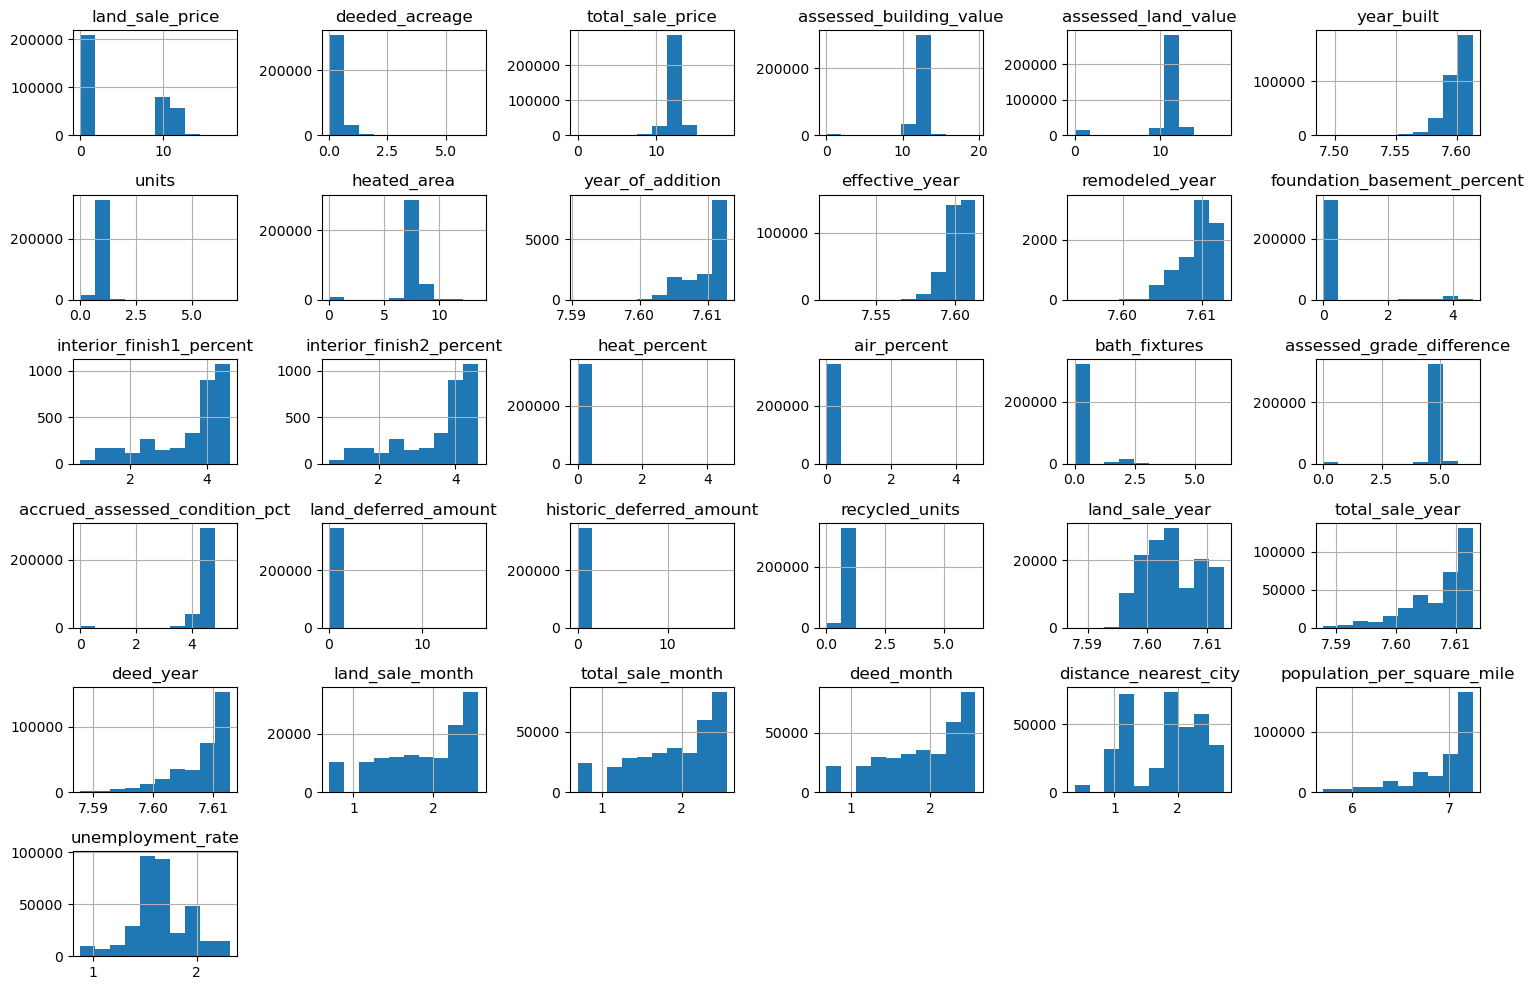

In [202]:
np.log1p(house[continuous_variables]).hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.8)
plt.subplots_adjust(wspace=0.8)
plt.tight_layout();

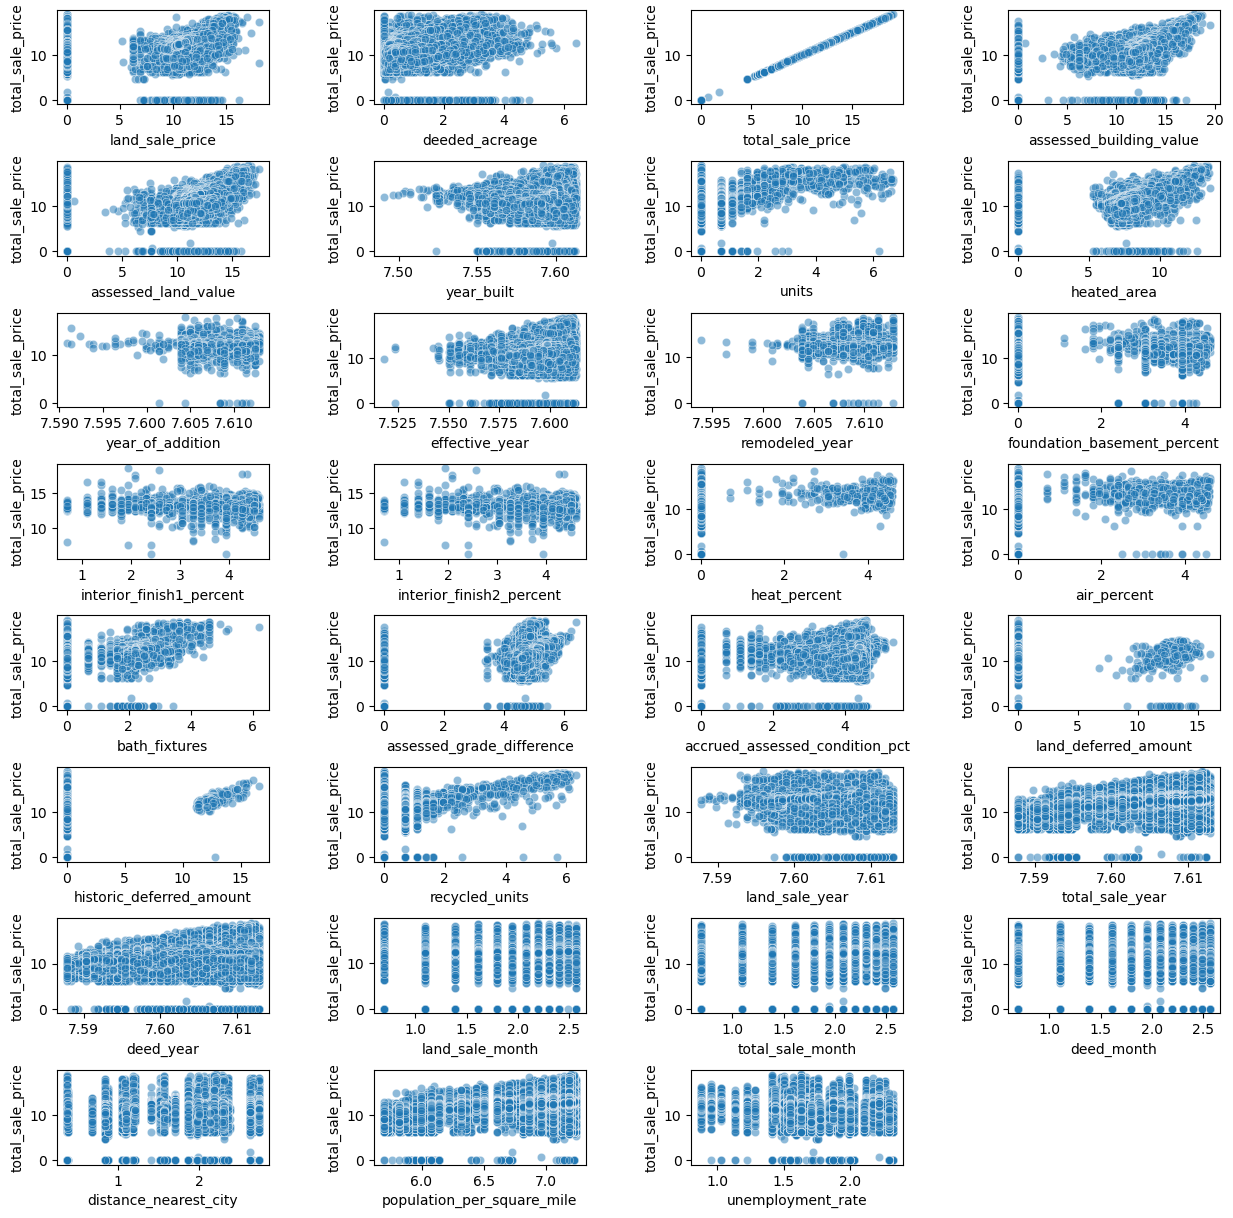

In [203]:
scatterplots(np.log1p(house[continuous_variables]), continuous_variables, ncol=4, figsize=(15, 15))

most variables looks have better correlation with total_sale_price after log transformation<br>

BUT, there are lots of variables have min value=0, for example assessed_building_value and heated_area.<br>

<font color=red>if we can remove these 0, maybe the accuracy of linear model will be improved. so keep in mind, this is another method to get a smaller dataset.

### 3.4.6 Heatmap Before and After Log Transformation

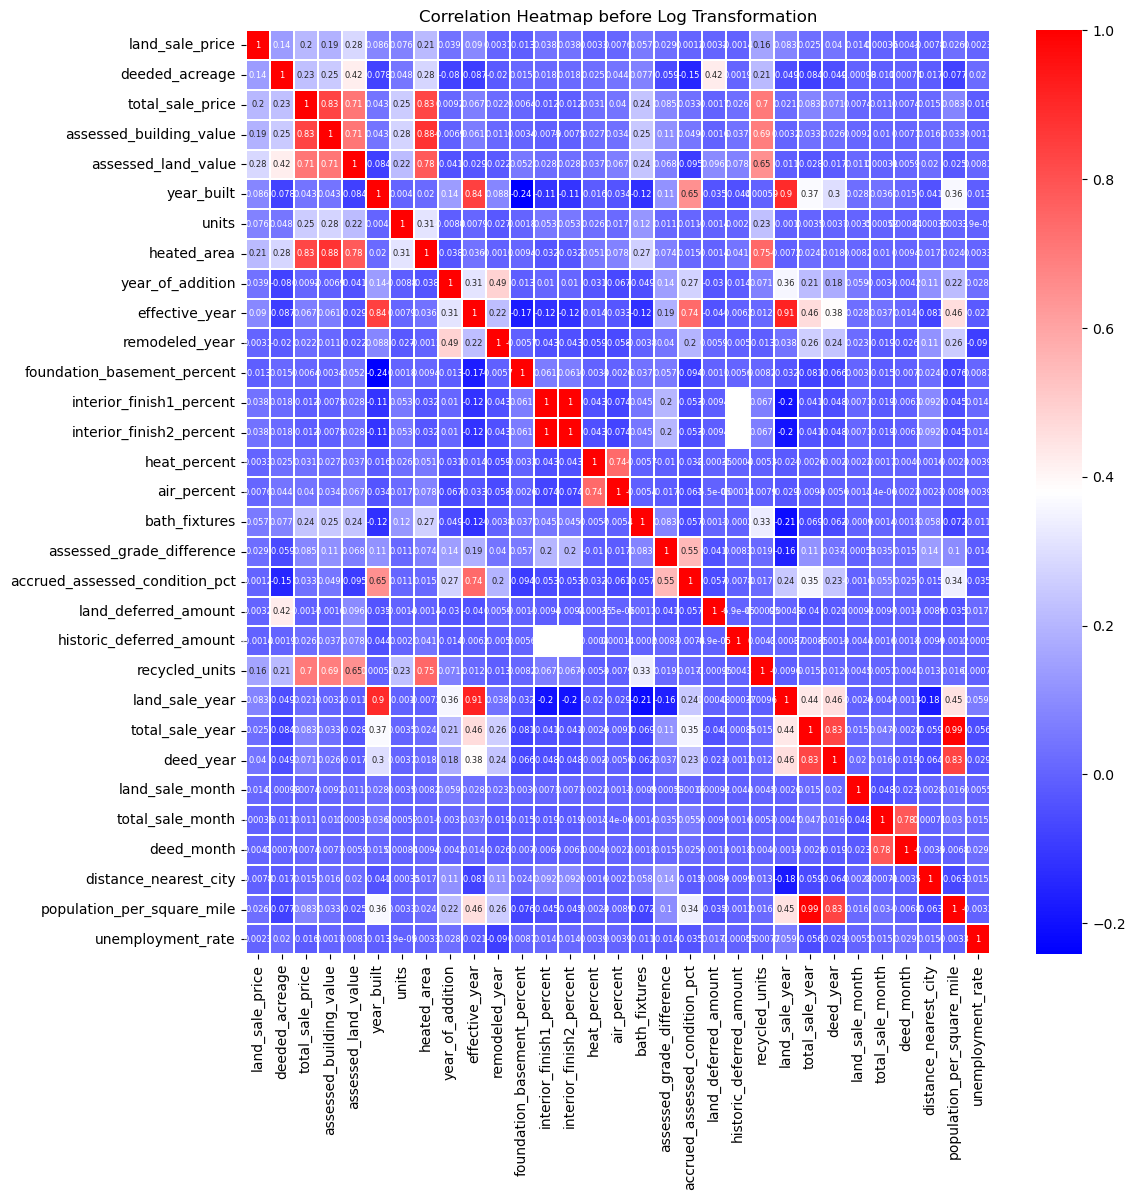

In [204]:
plt.figure(figsize=(12,12))
sns.heatmap(house.corr(numeric_only=True), annot=True, cmap="bwr", linewidths=0.05, annot_kws={"fontsize":6})
_ = plt.title('Correlation Heatmap before Log Transformation')

the variables assessed_building_value, assessed_land_value, heated_area and recycled_units have positive correlation with total_sale_price, same results as scatterplots<br>

interior_finish1_percent and interior_finish2_percent have correlation coefficient=1, that's surprising. keep in mind, check this later.<br>

there are some correlation between assessed_building_value and heated_area (coefficient=0.88)<br>

there are some correlation between total_sale_year and population_per_square_miles (coefficient=0.99)<br>

But this maybe fine, multicollinearity may not influence the model too much, however, **keep this in mind, if we need to improve the efficiency of the model, maybe we can remove some variables redundancy.**

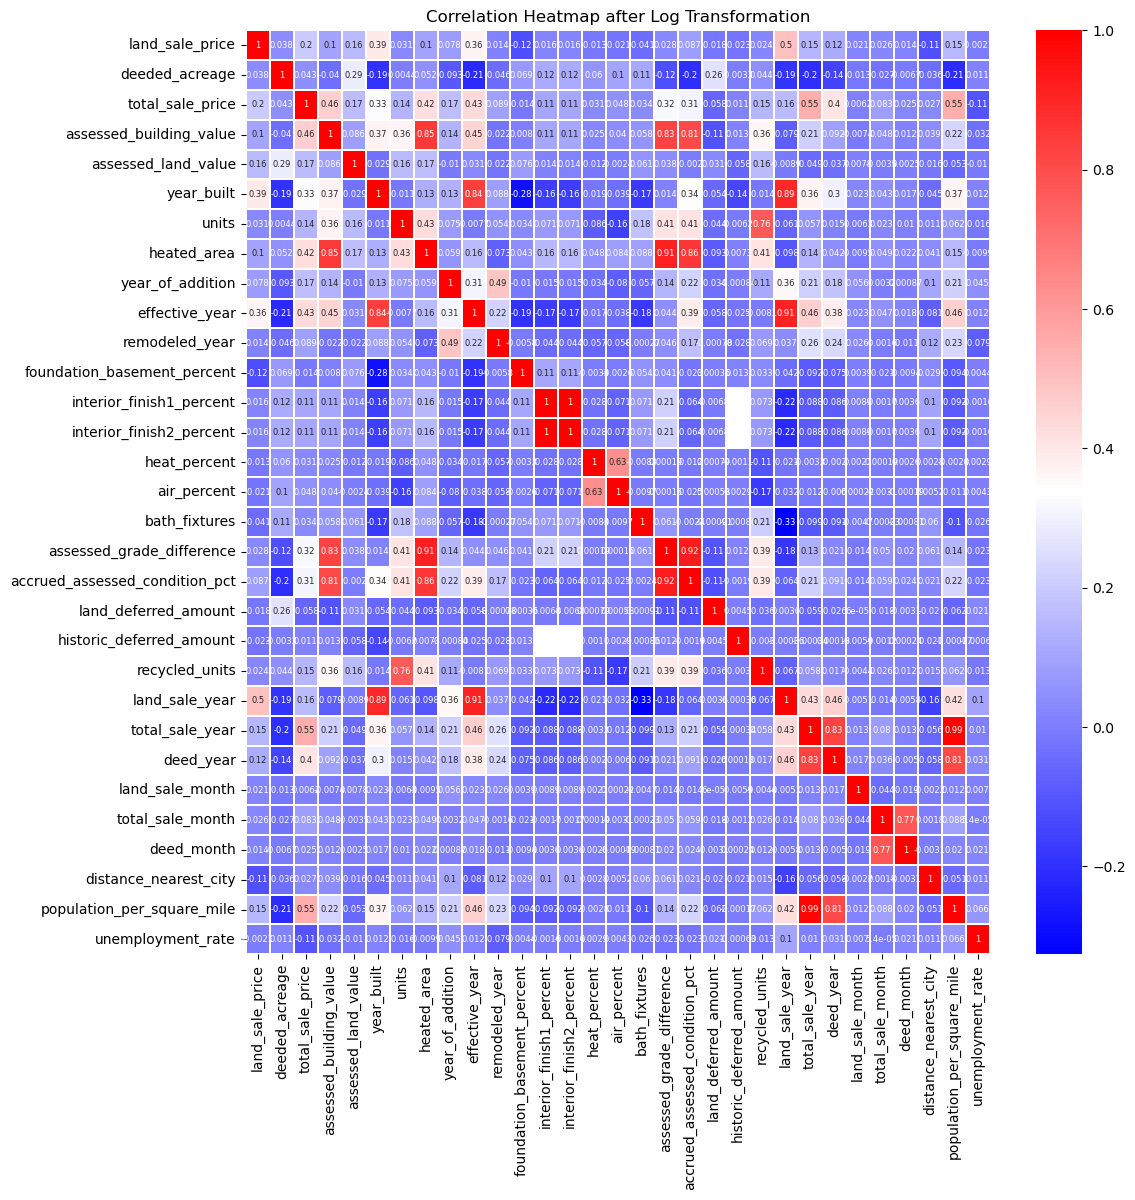

In [205]:
plt.figure(figsize=(12,12))
sns.heatmap(np.log1p(house[continuous_variables]).corr(numeric_only=True), annot=True, cmap="bwr", linewidths=0.05, annot_kws={"fontsize":6})
_ = plt.title('Correlation Heatmap after Log Transformation')

after log, the correlation of assessed_building_value, assessed_land_value, heated_area and recycled_units with total_sale_price became weak<br>

year_built, effective_year, assessed_grade_difference, accrued_assessed_condition_pct, total_sale_year, deed_year and population_per_square_mile became stranger.this is NOT big surpring, we find the exponential relationship between these datetime and total_sale_price.<br> 

interior_finish1_percent and interior_finish2_percent still have correlation coefficient=1, that's strange.<br>

there are still correlation between assessed_building_value and heated_area (coefficient=0.85) after log<br>

there are still correlation between total_sale_year and population_per_square_miles (coefficient=0.99) after log<br>

before log tranformation, have 4 high correlation variables 0.7-0.83

after log tranformation, have 6 high correlation variables 0.4-0.55

looks like log tranformation make it worse!!! but, keep in mind that we have lots of variables have min value=0, after remove them, will it be better?? 

## 3.5 Missing Values in Continuous Variables

In [206]:
missing_cont = pd.concat([house[continuous_variables].isna().sum().sort_values(ascending=False),
                     100*house[continuous_variables].isna().mean().sort_values(ascending=False)], axis=1)
missing_cont.columns=['count', '%']
missing_cont

,count,%
interior_finish2_percent,342754,99.024930
interior_finish1_percent,342754,99.024930
remodeled_year,337291,97.446617
year_of_addition,331757,95.847791
land_sale_year,208083,60.117182
land_sale_month,208079,60.116026
effective_year,5162,1.491351
year_built,5159,1.490485
deed_year,6,0.001733
recycled_units,0,0.000000


In [207]:
house['interior_finish1_percent'].unique(), house['interior_finish2_percent'].unique()

(array([nan,  3., 27., 34.,  7., 50., 95., 90.,  5.,  9., 91., 17., 25.,
        80., 65., 45., 99., 20., 36., 32., 70., 75., 43., 93., 57., 67.,
        55., 35.,  2., 82., 10., 85., 47., 60.,  8., 14., 76., 83., 39.,
        30., 11., 40., 87., 42., 38., 94., 58., 86., 28.,  1., 18., 22.,
        15., 63., 53., 62.,  4., 24., 88., 51., 78., 73., 98., 96., 81.,
        77., 12., 68., 66., 79., 56., 92., 21., 89.,  6., 97., 48., 84.,
        64., 54., 13., 59., 69., 71., 52., 72., 44., 16., 31., 33., 26.,
        74., 23., 46., 37., 19., 41., 61., 29.]),
 array([nan,  3., 27., 34.,  7., 50., 95., 90.,  5.,  9., 91., 17., 25.,
        80., 65., 45., 99., 20., 36., 32., 70., 75., 43., 93., 57., 67.,
        55., 35.,  2., 82., 10., 85., 47., 60.,  8., 14., 76., 83., 39.,
        30., 11., 40., 87., 42., 38., 94., 58., 86., 28.,  1., 18., 22.,
        15., 63., 53., 62.,  4., 24., 88., 51., 78., 73., 98., 96., 81.,
        77., 12., 68., 66., 79., 56., 92., 21., 89.,  6., 97., 48., 84.,
 

interior_finish1_percent and interior_finish2_percent have missing values over 99%.<br>

drop them!

In [208]:
house = house.drop(['interior_finish1_percent', 'interior_finish2_percent'], axis=1)

remodeled_year and year_of_addition have missing values over 90%. and the dataset already have lots of datetme variables, maybe we treat these two as categorical variables like remodel Yes or No, addition Yes or No.

create two new variables remodel and addition. if the row has remodeled_year then remodel is yes, otherwise, no. same for addition.

In [209]:
house.loc[house['remodeled_year'].notna(), 'remodel'] = 'Yes'
house.loc[house['remodeled_year'].isna(), 'remodel'] = 'No'
house.loc[house['year_of_addition'].notna(), 'addition'] = 'Yes'
house.loc[house['year_of_addition'].isna(), 'addition'] = 'No'
house = house.drop(['year_of_addition', 'remodeled_year'], axis=1)

In [210]:
missing_cat = pd.concat([house[categorical_variables].isna().sum().sort_values(ascending=False),
                     100*house[categorical_variables].isna().mean().sort_values(ascending=False)], axis=1)
missing_cat.columns=['count', '%']
missing_cat

,count,%
built_in4_description,346126,99.999133
built_in5_description,346115,99.995955
built_in3_description,346064,99.981221
special_write_in,346042,99.974865
historic_deferred_code,345915,99.938173
street_suffix,345760,99.893392
land_deferred_code,345735,99.886170
built_in2_description,345531,99.827232
special_district1,343388,99.208099
mailing_address3,340835,98.470512


In [211]:
missing_cat[missing_cat['%']>95].index

Index(['built_in4_description', 'built_in5_description',
       'built_in3_description', 'special_write_in', 'historic_deferred_code',
       'street_suffix', 'land_deferred_code', 'built_in2_description',
       'special_district1', 'mailing_address3', 'roof_floor_system',
       'street_prefix', 'street_misc'],
      dtype='object')

In [212]:
house = house.drop(['built_in4_description', 'built_in5_description',
       'built_in3_description', 'special_write_in', 'historic_deferred_code',
       'street_suffix', 'land_deferred_code', 'built_in2_description',
       'special_district1', 'mailing_address3', 'roof_floor_system',
       'street_prefix', 'street_misc'], axis=1)

In [213]:
house.head()

,owner1,owner2,mailing_address1,mailing_address2,real_estate_id,street_number,street_name,street_type,planning_jurisdiction,township,fire_district,land_sale_price,zoning,deeded_acreage,total_sale_price,assessed_building_value,assessed_land_value,parcel_identification,billing_class,property_description,land_classification,deed_book,deed_page,vcs,property_index,year_built,units,heated_area,utilities,effective_year,story_height,design_style,foundation_basement,foundation_basement_percent,exterior_wall,heat,heat_percent,air,air_percent,bath,bath_fixtures,built_in1_description,grade,assessed_grade_difference,accrued_assessed_condition_pct,land_deferred_amount,historic_deferred_amount,recycled_units,disq_and_qual_flag,land_disq_and_qual_flag,type_and_use,physical_city,physical_zip_code,physical_location,land_sale_year,total_sale_year,deed_year,land_sale_month,total_sale_month,deed_month,distance_nearest_city,nearest_city,population_per_square_mile,unemployment_rate,remodel,addition
0,BONES 13 LLC,NaN,306 MIDENHALL WAY,CARY NC 27513-5569,3,6012,TRIANGLE,DR,RA,8,nan,0,IX-3,2.00,740000,524503,392040,0778.03 40 5654 000,1,LO7 OLD SOUTH DEVELOPMENT CORP,C,14675,2635,GWRA001,J W BURRESS,1979.0,0,8508,ALL,1984.0,A,A,D,0,O,G,0,A,10,I,0,NaN,29.61,110,47,0,0,0,A,NaN,20.0,RALEIGH,27617.0,6012 TRIANGLE DR A,NaN,2012.0,2012.0,NaN,3.0,3,13.261294,CARY,1111.136263,7.3,No,No
1,6421 WESTGATE REALTY LLC,NaN,PO BOX 90667,RALEIGH NC 27675-0667,43396,6408,OLD WESTGATE,RD,RA,8,nan,0,IX-3,2.54,1650000,5013736,886242,0768.04 92 9999 000,1,PROP OF WILLIAMS INVESTMENT CORPORATION,C,14716,1642,GWRA001,WESTGATE JEEP SALES & SERVICE,1965.0,0,27778,ALL,2015.0,A,A,D,0,B,A,0,A,0,I,0,NaN,29.71,130,99,0,0,0,A,NaN,19.0,RALEIGH,27617.0,6408 OLD WESTGATE RD,NaN,2012.0,2012.0,NaN,4.0,4,13.261294,CARY,1111.136263,7.3,Yes,No
2,ASH GREY PROPERTIES LLC,NaN,5805 LEASE LN,RALEIGH NC 27617-4708,45910,8401,EBENEZER CHURCH,RD,RA,8,nan,0,IX-3,0.97,105000,80884,171125,0777.02 69 6704 000,1,LO7 ASH GREY PROPERTIES LLC BM2013-01575,R,14744,1699,GWRA001,GWRA001,1959.0,1,616,E,1985.0,A,A,D,0,A,A,0,A,0,A,0,NaN,D-10,75,76,0,0,1,A,NaN,1.0,RALEIGH,27617.0,8401 EBENEZER CHURCH RD,NaN,2012.0,2012.0,NaN,4.0,4,13.261294,CARY,1111.136263,7.3,No,No
3,CAP2 REALTY LLC,NaN,7201 SPARHAWK RD,WAKE FOREST NC 27587-4529,47829,6508,MT HERMAN,RD,RA,8,nan,0,IX-3,2.90,975000,1187520,409290,0768.02 86 1192 000,1,LO1 6508 MT HERMAN RD BM2015-00579,C,19002,0217,GWRA001,ECGS,2005.0,0,20700,ALL,2010.0,A,A,NaN,0,O,A,64,A,64,I,0,NaN,29.55,100,91,0,0,0,A,NaN,20.0,RALEIGH,27617.0,6508 MT HERMAN RD,NaN,2012.0,2022.0,NaN,5.0,4,13.261294,CARY,1111.136263,7.3,Yes,Yes
4,A&A OF NC INC,NaN,5917 TRIANGLE DR,RALEIGH NC 27617-4742,65238,5917,TRIANGLE,DR,RA,8,nan,0,IX-3,0.95,330000,300764,186219,0778.04 50 5768 000,1,LO17 PROP OLD SOUTH DEV CORP,D,15046,2414,GWRA001,A & A OF N.C./DBA DIAMOND TOUCH CONSTRUC,1972.0,0,4000,WSE,2000.0,A,A,NaN,0,O,A,54,A,54,I,0,NaN,41.61,110,75,0,0,0,A,NaN,82.0,RALEIGH,27617.0,5917 TRIANGLE DR,NaN,2012.0,2012.0,NaN,12.0,12,13.261294,CARY,1111.136263,7.3,No,Yes


## 3.6 Output and Conclusion

In [214]:
house.to_csv('house_Nov02_2023.csv')

based on these EDA, we find 

1. drop nan variable threshold is 95%.    

2. this is a very large skewed dataset with 346129 rows and 81 columns.

3. we may need to remove small outliers like min value=0 or remove large outliers like value large than 1.5 times 75% percentile. or do both for data cleaning. this will be helpful not only for linear but also non-linear.

4. we may also try use the dirty dataset for some non-linear model like RandomForest regressor, Gradient Boost, Xgboost, Adaboost etc. But the disadvantage is the cost will be high and time consuming will be much longer for such a big dataset.

5. we may also try to use weighted linear regression, never used this kind of linear regression before, need to do some research.

6. for next step data preprocessing and training, suggest try to start with dirty large skewed dataset with linear model, try procedure like add new variables (square or square root), log transformation, weighted linear etc to see if you can improve the dataset or not. 

then try to use non-linear models on the large skewed dataset, must consider the time used, if it's very long time (for exmaple, 10 min per run), may need to do some data claening further, because, this will a disaster for cross validation and hyperparameter tuning.

keep exploring!!!

